In [1]:
import glob

import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt


def show_img(image, plt_size=8):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(111)
    ax.imshow(image)


def show_img_gray(image, plt_size=8):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')


image_paths = glob.glob('Images/*.jpg')
images = []

for image in image_paths:
    img = cv2.imread(image)
    images.append(img)

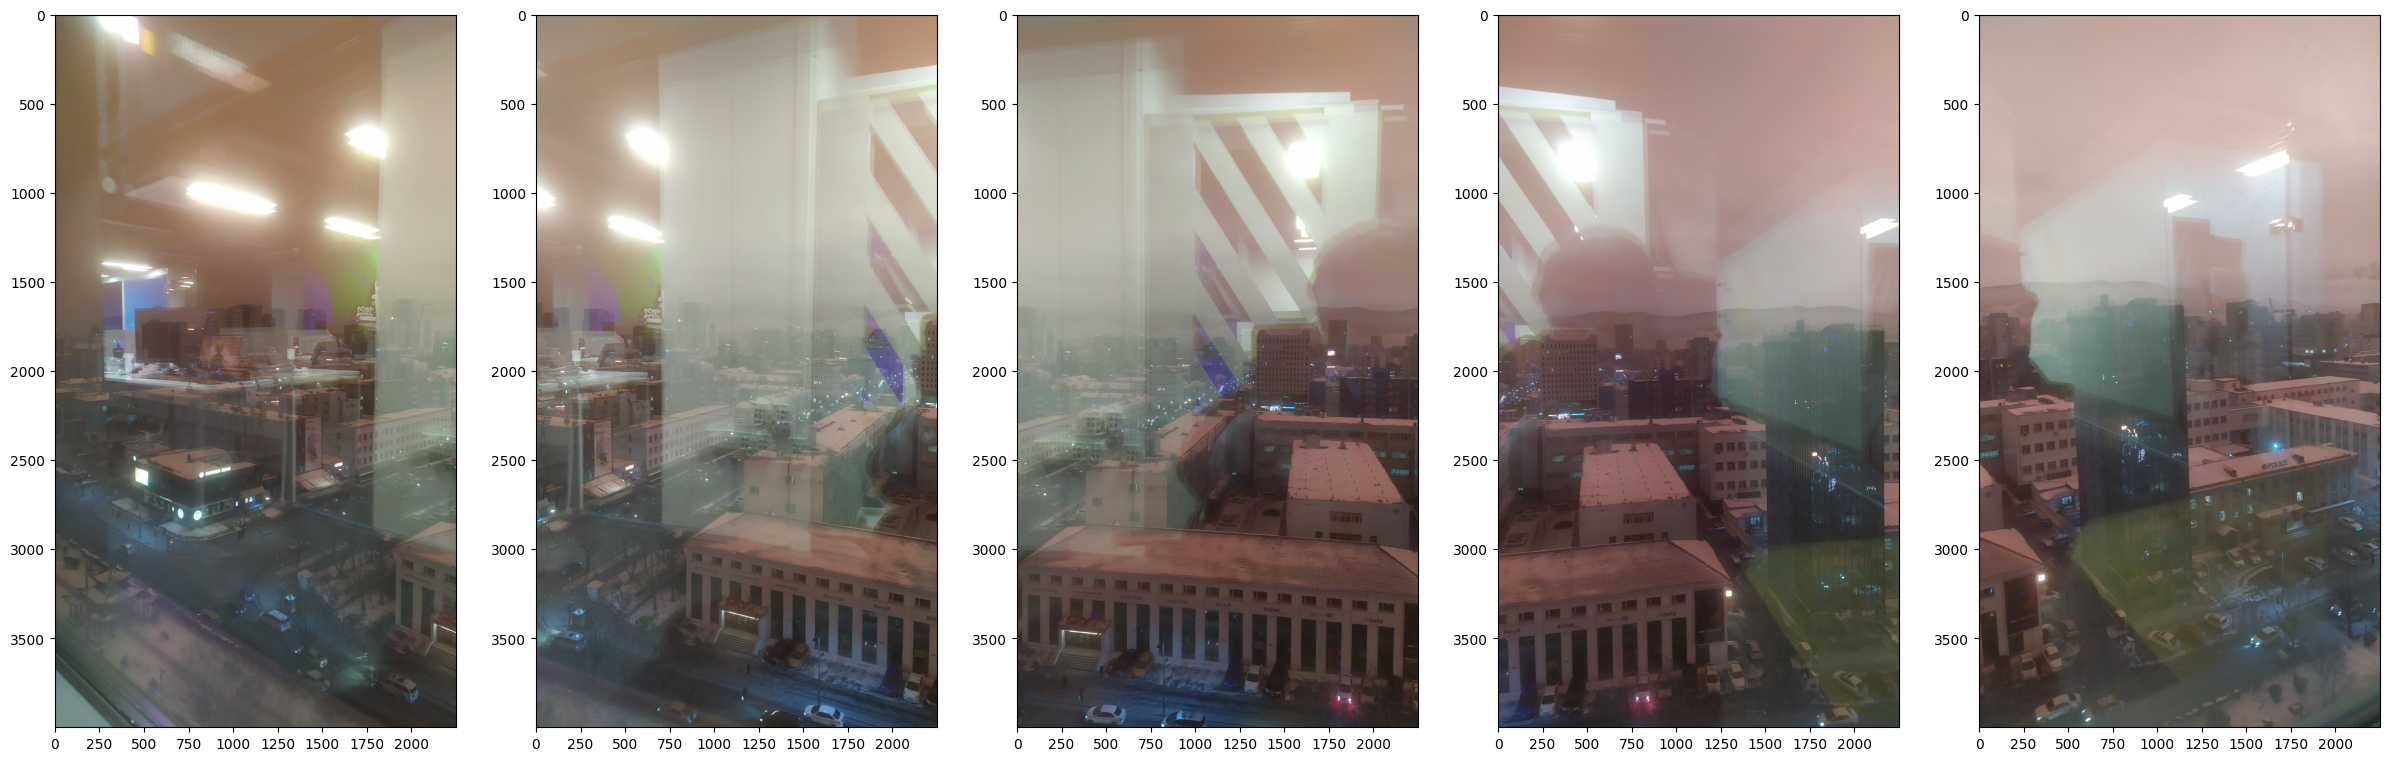

In [14]:
fig = plt.figure(figsize=(30, 30))
i = 1
for image in images:
    ax = fig.add_subplot(150 + i)
    ax.imshow(image)
    i += 1

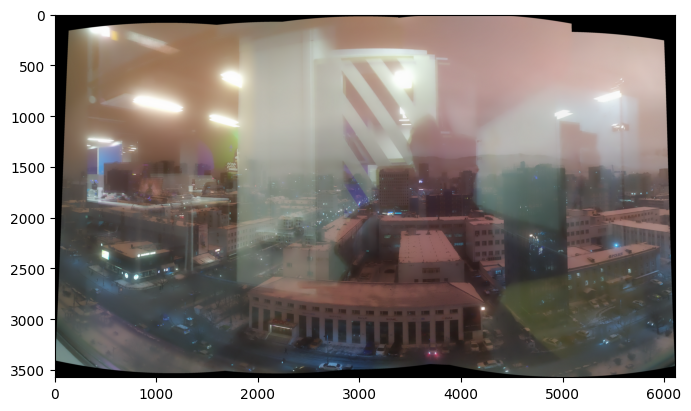

In [2]:
imageStitcher = cv2.Stitcher_create()
error, stitched_img = imageStitcher.stitch(images)
if not error:
    show_img(stitched_img)

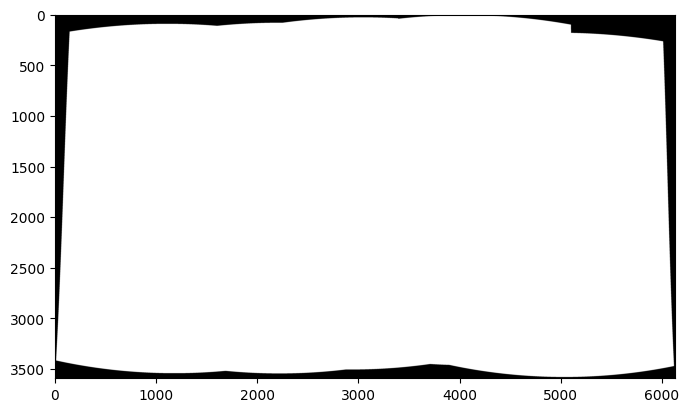

In [3]:
stitched_img = cv2.copyMakeBorder(stitched_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))
gray = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
show_img_gray(thresh_img)

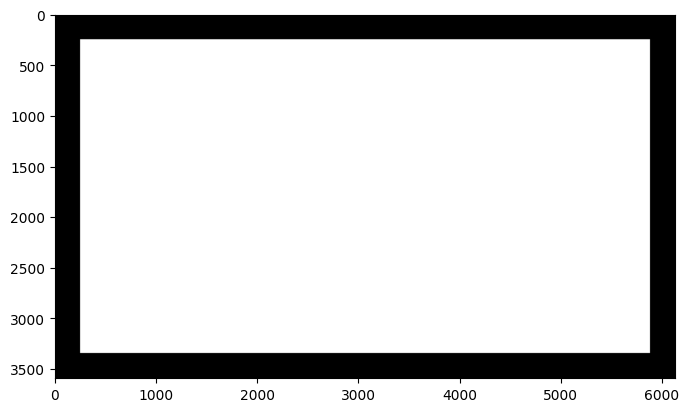

In [30]:
contours = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(contours)
areaOI = max(contours, key=cv2.contourArea)

mask = np.zeros(thresh_img.shape, dtype="uint8")
x, y, w, h = cv2.boundingRect(areaOI)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

minRectangle = mask.copy()
sub = mask.copy()

while cv2.countNonZero(sub) > 0:
    minRectangle = cv2.erode(minRectangle, None)
    sub = cv2.subtract(minRectangle, thresh_img)

show_img_gray(minRectangle)

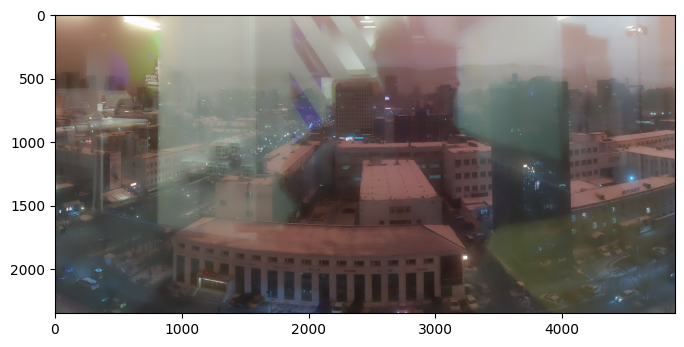

In [19]:
contours = cv2.findContours(minRectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
areaOI = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(areaOI)
stitched_img = stitched_img[y:y + h, x:x + w]
show_img(stitched_img)